# Energy diagram for fully liganded branch

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import log
import numpy as np

In [28]:
# First step
# Rate constants
delta = 1.3e+4
gamma = 1600
K1 = delta / gamma # Equilibrium constant
# Second step
# Rate constants
beta = 2.8e+4
alpha = 700
K2 = beta / alpha # Equilibrium constant

In [29]:
def activation_energy(k, t_room=20, ff=1e+7):
    """Calculate activation energy."""
    R = 8.314 # J/(M*K)
    T = 273 + t_room # in K
    return -R * T * log(k / ff)

In [30]:
def energy_profile(k1, k2, k3, k4, align=1, t_room=20, ff=1e+7):
    E = [0]
    E.append(E[-1] + activation_energy(k1, t_room, ff))
    E.append(E[-1] - activation_energy(k2, t_room, ff))
    E.append(E[-1] + activation_energy(k3, t_room, ff))
    E.append(E[-1] - activation_energy(k4, t_room, ff))
    E = np.repeat(E, 2)
    if align == 2:
        E = E - E[5]
    if align == 3:
        E = E - E[8]
    return E

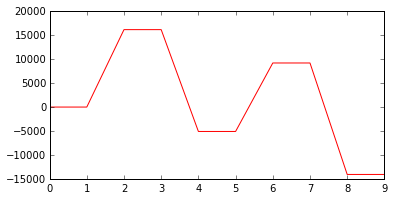

In [31]:
E = energy_profile(delta, gamma, beta, alpha)
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ax.plot(E, 'r')

In [32]:
# GlyR alpha1
d1, g1, b1, a1 = 1.3e+4, 1600, 2.8e+4, 700
# GlyR alpha2
d2, g2, b2, a2 = 4300, 4400, 127000, 370
# GlyR alpha3
d3, g3, b3, a3 = 13000, 2500, 150000, 1900

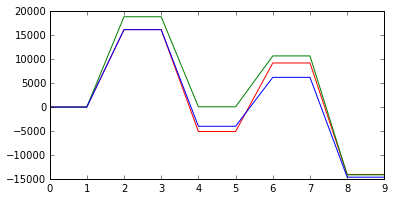

In [33]:
E1 = energy_profile(d1, g1, b1, a1)
E2 = energy_profile(d2, g2, b2, a2)
E3 = energy_profile(d3, g3, b3, a3)
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ax.plot(E1, 'r')
ax.plot(E2, 'g')
ax.plot(E3, 'b')

In [34]:
# Sine ACh
d1, g1, b1, a1 = 19200, 86400, 125000, 2100
# Sine CCh
d2, g2, b2, a2 = 1500, 75300, 100000, 1900

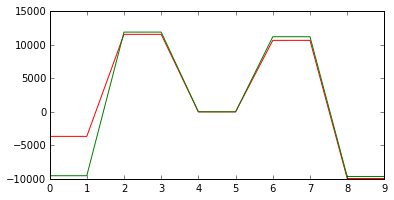

In [35]:
EACh = energy_profile(d1, g1, b1, a1, align=2)
ECCh = energy_profile(d2, g2, b2, a2, align=2)
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ax.plot(EACh, 'r')
ax.plot(ECCh, 'g')